In [1]:
import csv
import re
import pandas as pd
from collections import defaultdict, Counter


In [41]:
with open("brennt_vollgas.log") as f:
    lines = f.readlines()

# Alle Pakete als Hex-Tupel abspeichen
complete = [tuple(re.findall(".{2}", l.strip())) for l in lines if ':' not in l]
numeric = [ tuple(int(n, base=16) for n in c) for c in complete ]

In [42]:
binned = defaultdict(list)
count = Counter()
for p in numeric:
    binned[p[0]].append(p)

In [43]:
def checksum_ok(pkt):
    cs = sum(pkt[0:-1]) & 0xFF
    return cs == pkt[-1]


In [44]:
checksum_ok([0,0,0,0,0,0,0,2])

False

In [45]:
checksum_per_format = {}
for pkttype in binned:
    total = 0
    good = 0
    for pkt in binned[pkttype]:
        if checksum_ok(pkt):
            good += 1
        total += 1
    checksum_per_format[pkttype] = (total, good)

In [46]:
def split_pkt(pkt, separator):
    try:
        i = pkt.index(separator)
    except ValueError:
        return pkt, []
    return pkt[0:i], pkt[i:]
    

In [99]:
ok_per_format = Counter()
all_per_format = Counter()
clean_pkt = defaultdict(list)
all_clean = []

for pkt in numeric:
    # Ähnlich wie im Original
    if len(pkt)<=10:
        continue;
    pkt = pkt[:11]
    typ = pkt[1]
    separator = None
    if typ == 0:
        # Noch irgendwelche magic mit 0 an verschiedenen Stellen erst mal disregard
        separator = 0 # Eigentlich 0 lt code
    else:
        separator = 0
    left, right = split_pkt(pkt, separator)
    """
    if typ == 0:
        print (separator, left, right)
        c -= 1
        if c<=0:
            break
    """
    all_per_format.update([typ])
    if len(right)==0:
        continue
    if checksum_ok(pkt):
        ok_per_format.update([typ])
        clean_pkt[typ].append(pkt)
        all_clean.append(pkt)

In [106]:
with open("/tmp/clean.hex", 'w') as f:
    for row in all_clean:
        f.write("".join(["{:02x}".format(x) for x in row])+"\n")
        


In [49]:
all_per_format

Counter({0: 96307,
         20: 198,
         63: 161,
         17: 5968,
         30: 11976,
         164: 5769,
         4: 1510,
         191: 10510,
         2: 19847,
         25: 12071,
         1: 230,
         90: 2,
         45: 184,
         54: 212,
         15: 973,
         14: 5758,
         78: 949,
         12: 723,
         11: 1164,
         9: 220,
         8: 226,
         7: 225,
         6: 10120,
         5: 525,
         3: 1707,
         200: 453,
         118: 387,
         91: 15550,
         10: 2532,
         111: 1,
         48: 213,
         13: 680,
         18: 9750,
         16: 192,
         19: 196,
         21: 182,
         22: 180,
         23: 194,
         24: 191,
         26: 184,
         27: 184,
         28: 188,
         29: 190,
         31: 180,
         32: 177,
         33: 190,
         34: 185,
         240: 5587,
         35: 189,
         36: 177,
         37: 186,
         38: 181,
         39: 182,
         40: 181,
         41: 

In [50]:
clean_pkt[9][0][1:9]

(9, 0, 23, 0, 214, 0, 0, 0)

In [51]:
import struct
def decode_as(raw, fmt):
    b = struct.pack("B"*len(raw), *raw)
    return struct.unpack(fmt, b)
decode_as((20, 0, 20, 0, 214, 0, 0, 0), ">d")

(2.3879696944149446e-212,)

In [52]:
for t in clean_pkt:
    s = clean_pkt[t][300][3:7]
    print(t, decode_as(s, '<i'))
    #print(t, decode_as(s, '>i'))

0 (0,)


IndexError: list index out of range

In [53]:
for p in clean_pkt[9]:
    s = p[1:5]
    print(t, decode_as(s, '<i'))


20 (1507337,)
20 (1507337,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601,)
20 (29294601

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>, <AxesSubplot:>]],
      dtype=object)

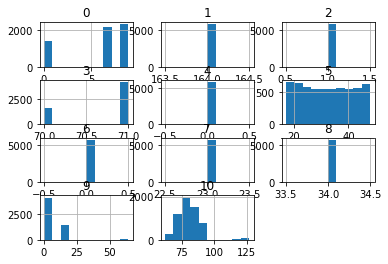

In [54]:
df_idle = pd.DataFrame(clean_pkt[164])
df_idle.hist()

<AxesSubplot:>

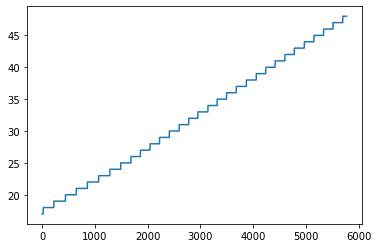

In [60]:
df_idle[5].plot()

/usr/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


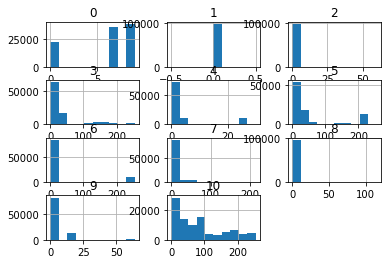

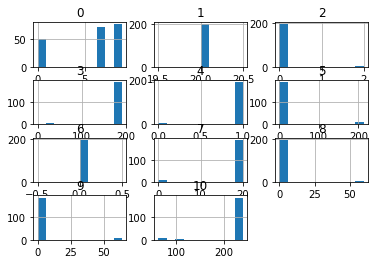

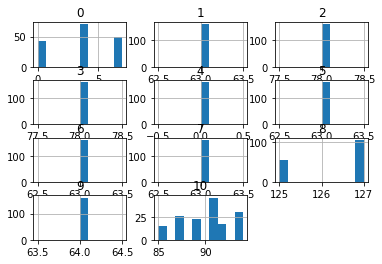

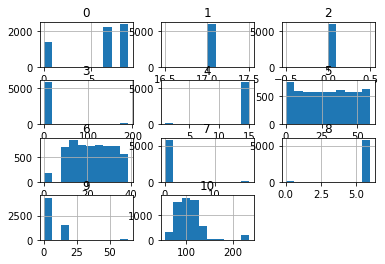

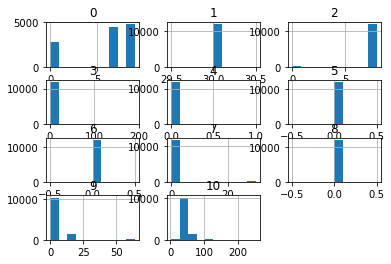

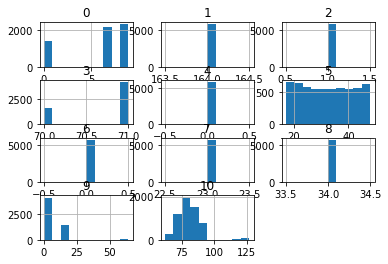

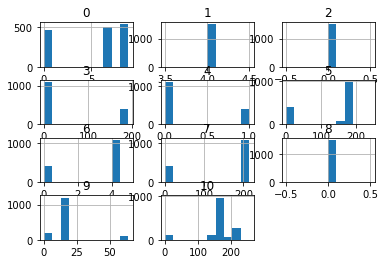

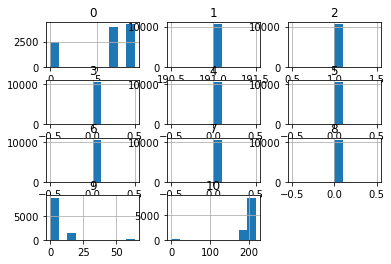

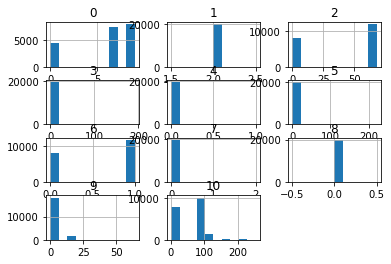

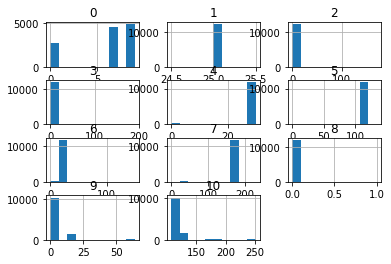

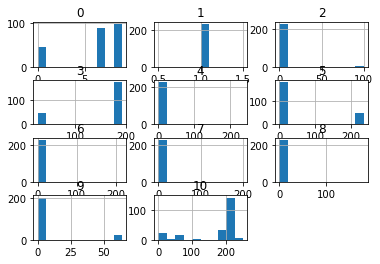

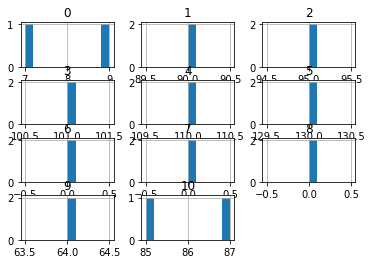

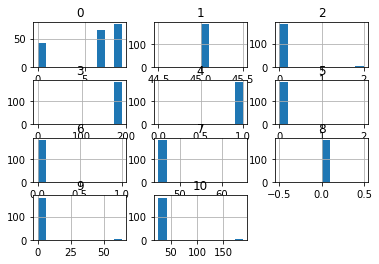

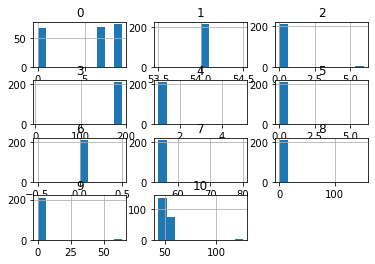

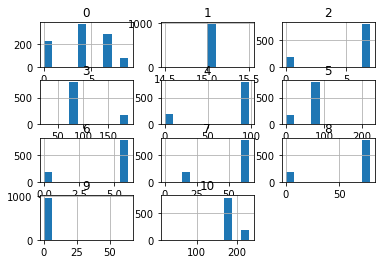

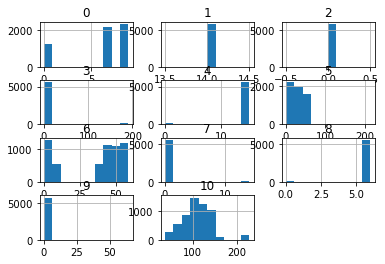

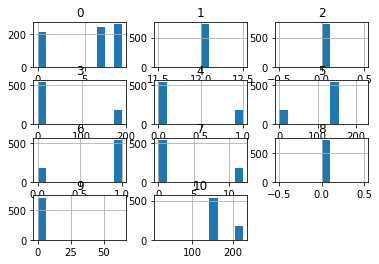

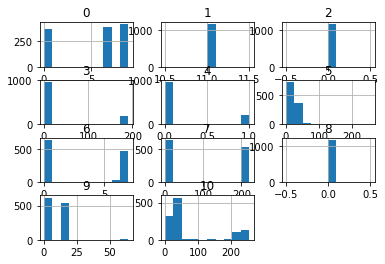

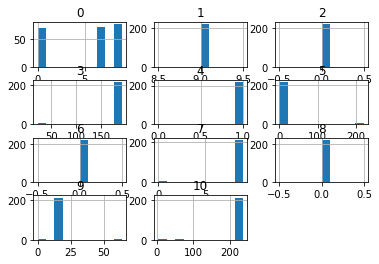

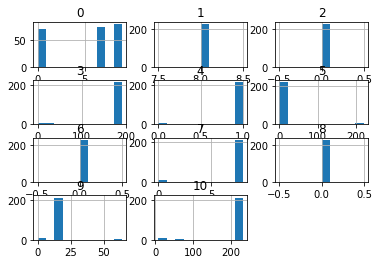

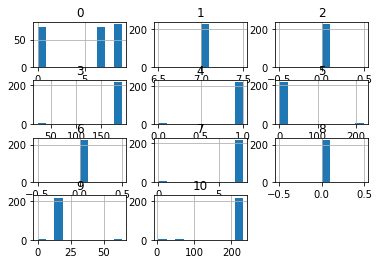

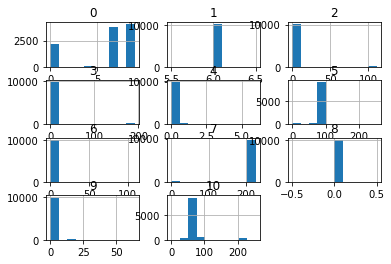

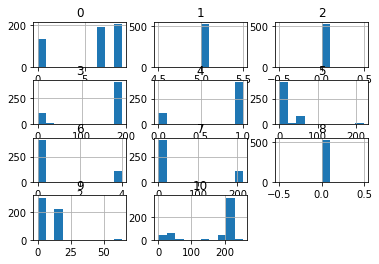

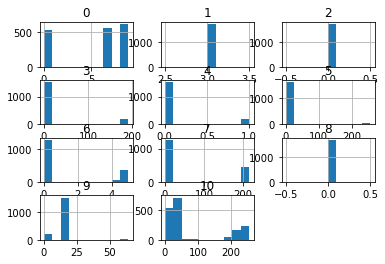

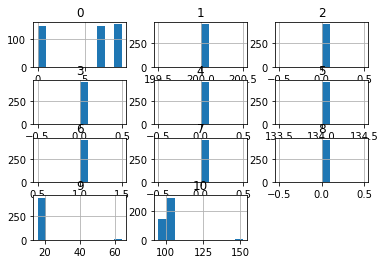

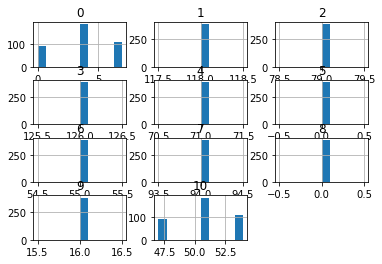

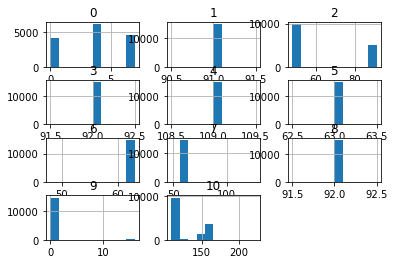

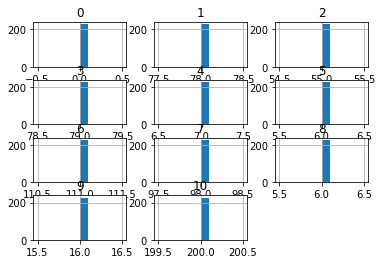

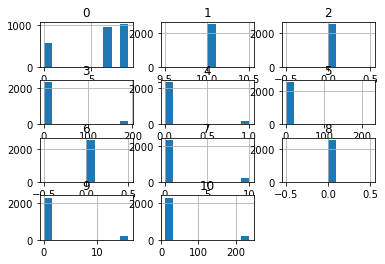

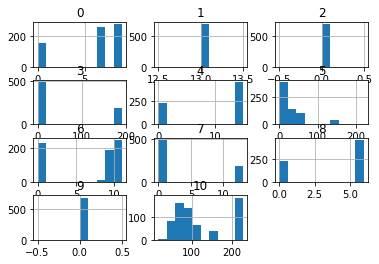

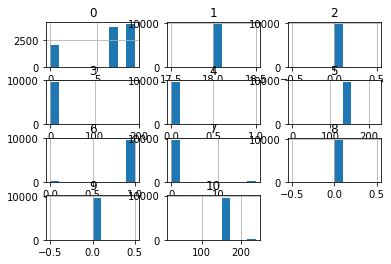

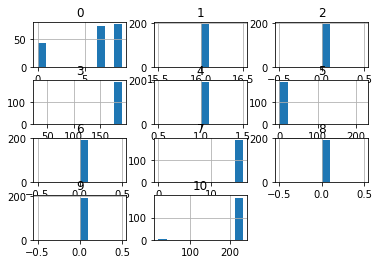

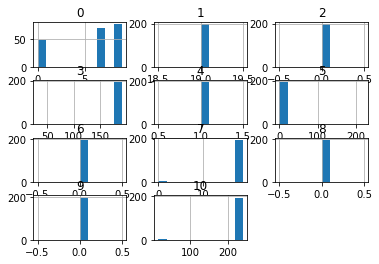

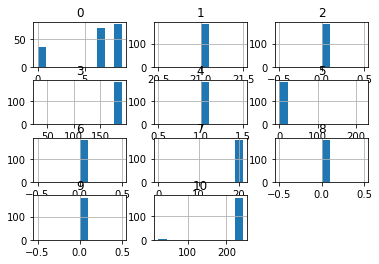

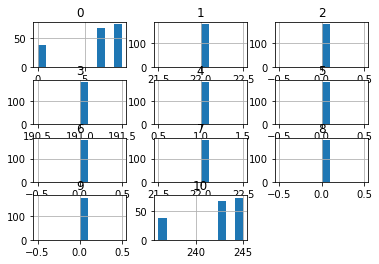

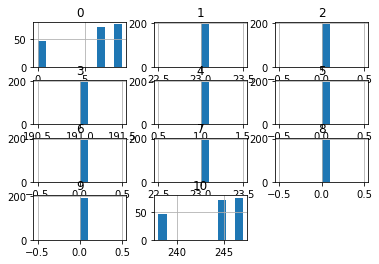

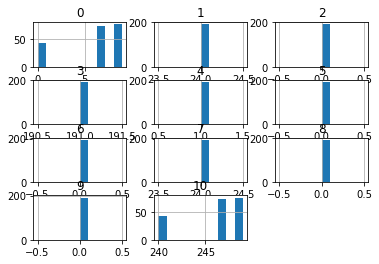

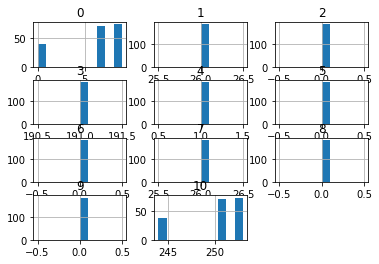

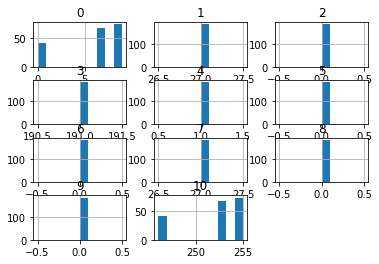

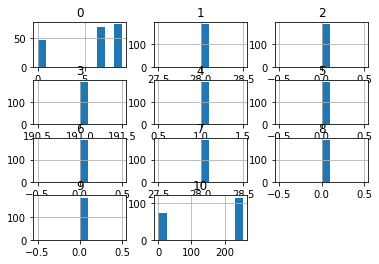

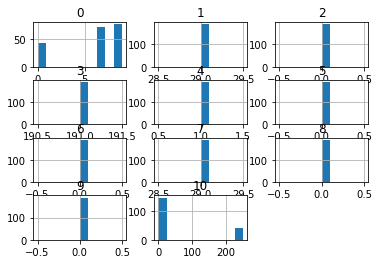

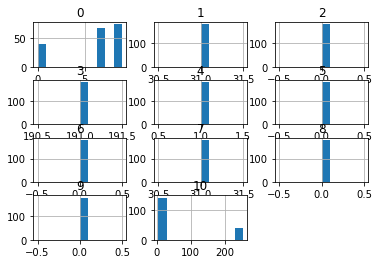

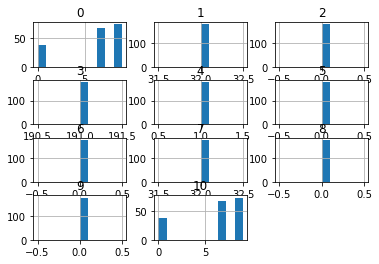

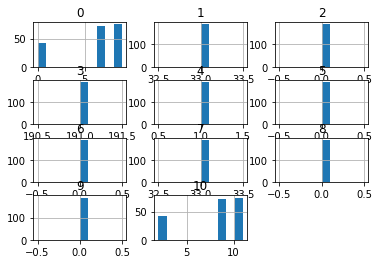

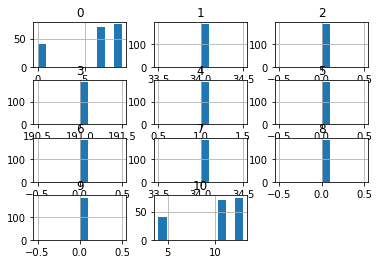

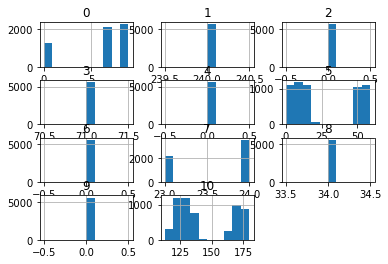

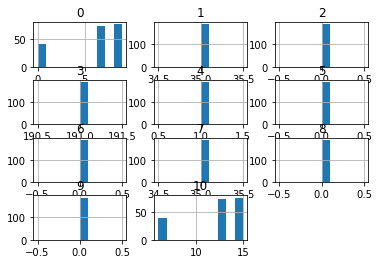

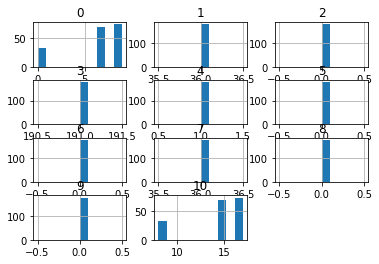

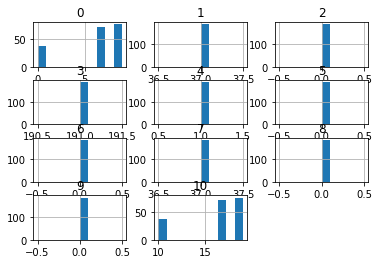

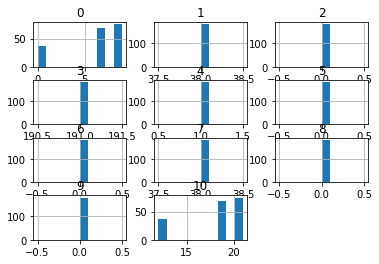

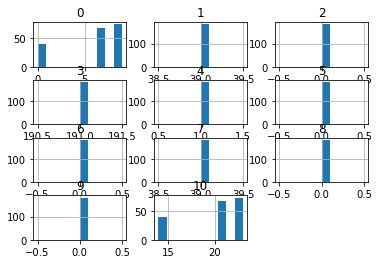

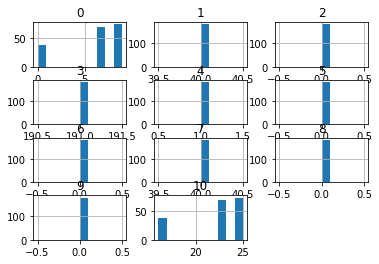

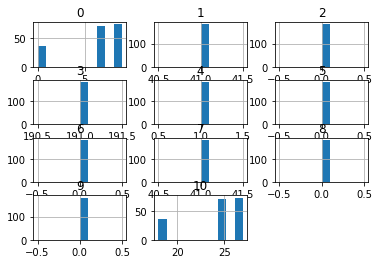

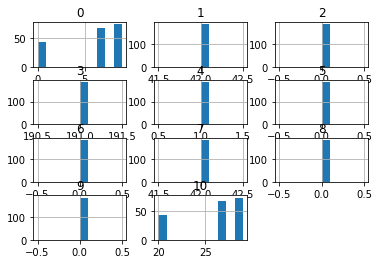

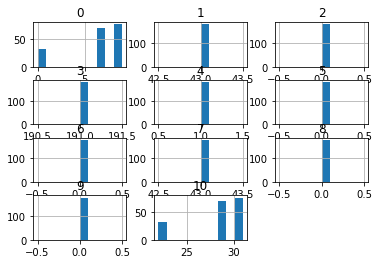

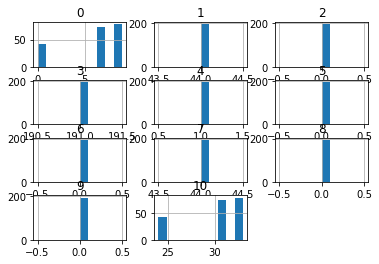

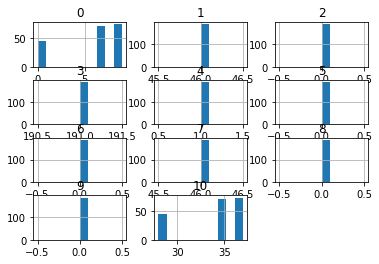

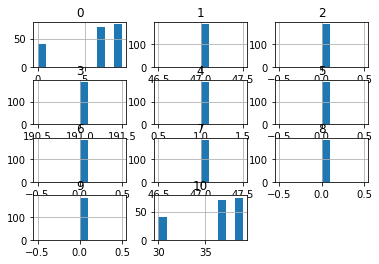

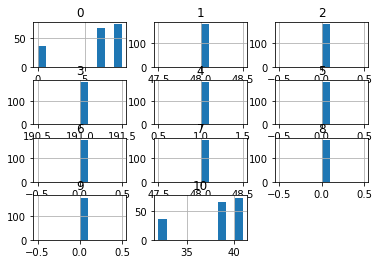

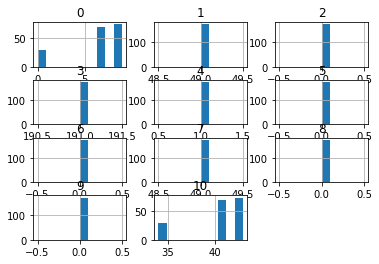

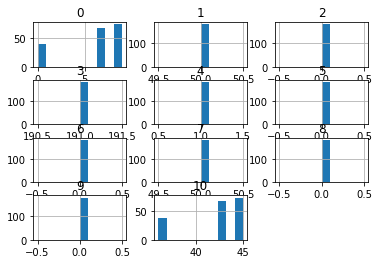

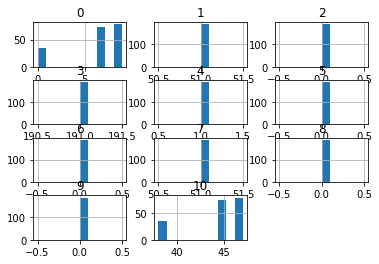

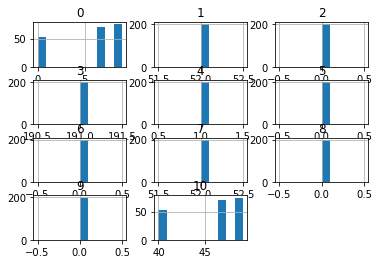

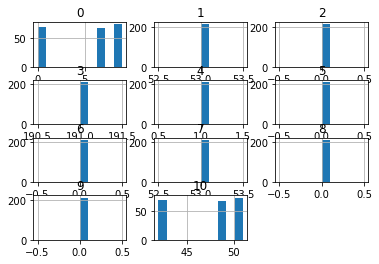

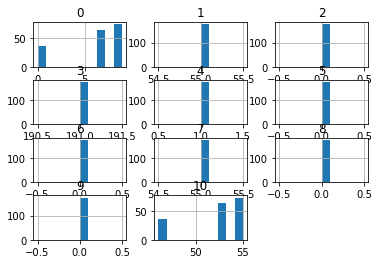

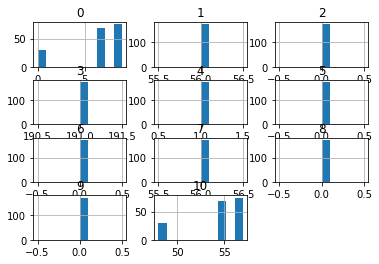

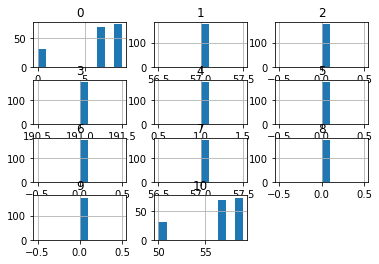

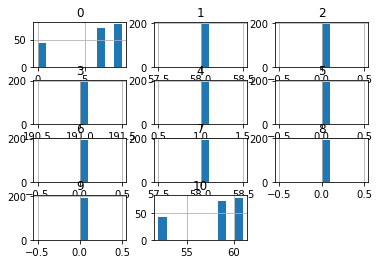

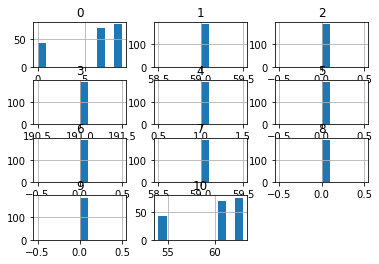

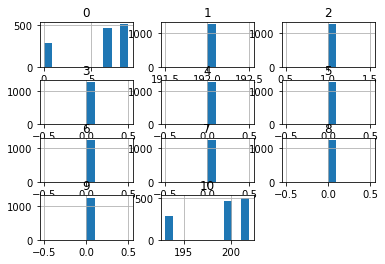

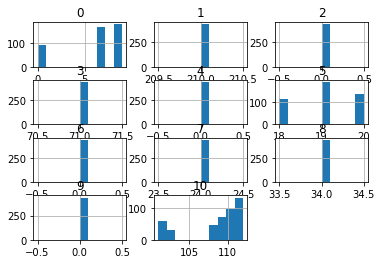

In [63]:
for x in clean_pkt:
    df_vollgas = pd.DataFrame(clean_pkt[192])
    df_vollgas.hist()

In [179]:
[bin(int(x)) for x in df_idle[9].unique() if not pd.isna(x)]

['0b1000000',
 '0b1000010',
 '0b111001',
 '0b1000111',
 '0b0',
 '0b1100000',
 '0b1001101',
 '0b1001100',
 '0b1000001',
 '0b111100',
 '0b11001101',
 '0b10001000',
 '0b1001000',
 '0b100010',
 '0b1000110',
 '0b111011',
 '0b1111001',
 '0b1000101',
 '0b1101111',
 '0b110']

In [180]:
[bin(int(x)) for x in df_vollgas[9].unique() if not pd.isna(x)]

['0b1000000',
 '0b111111',
 '0b1001000',
 '0b1000111',
 '0b1000010',
 '0b0',
 '0b111011',
 '0b1100000',
 '0b10001000',
 '0b10000',
 '0b100010',
 '0b11000001',
 '0b11010000',
 '0b10110000',
 '0b10010100',
 '0b100000',
 '0b11000011',
 '0b1010101',
 '0b11001010',
 '0b1010110',
 '0b11100110',
 '0b1011010',
 '0b11111000',
 '0b101001',
 '0b11100101',
 '0b1011110',
 '0b1011111',
 '0b11101001',
 '0b1110100',
 '0b111110',
 '0b1011100',
 '0b10000010',
 '0b110',
 '0b1110',
 '0b110101',
 '0b10010111',
 '0b10100001',
 '0b10010000',
 '0b1000100',
 '0b10111',
 '0b10101011',
 '0b10110010',
 '0b100101',
 '0b1011011',
 '0b101111',
 '0b1101001',
 '0b11100',
 '0b10001001',
 '0b10011011',
 '0b10111101',
 '0b1110011',
 '0b11110',
 '0b10111110',
 '0b1100010',
 '0b1110000',
 '0b10111111',
 '0b10111011',
 '0b11001011',
 '0b11010',
 '0b11110100',
 '0b1',
 '0b110000',
 '0b10001100',
 '0b11111',
 '0b11001000',
 '0b1010100',
 '0b11001001',
 '0b1010011',
 '0b11010100',
 '0b11000101',
 '0b110111',
 '0b10010',
 '0b11

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>, <AxesSubplot:>]],
      dtype=object)

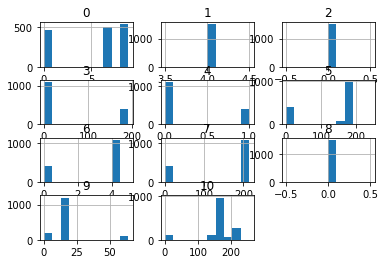

In [272]:
pd.DataFrame(clean_pkt[4]).hist()

In [ ]:
# Byte 9: Status???